In [1]:
using Pkg
Pkg.activate("../")
#Pkg.instantiate()

  Activating project at `~/Documents/UCL/3x2_analytical`


In [2]:
using LinearAlgebra
using ForwardDiff
using Plots
using LimberJack
using CSV
using YAML
using NPZ
using DataFrames
using PythonCall
using Statistics
using Interpolations
using SparseArrays
sacc = pyimport("sacc");

# Judith's Chain

In [3]:
#using DelimitedFiles
#chain = readdlm("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/cosmodc2_3x2pt_fourier_lcdm.txt");

In [4]:
#chain_vals = chain[200:end, :]
#param_names = chain[1, :];

#post = chain_vals[:, 32]
#index_of_min = argmax(post)
#row_with_min = chain_vals[index_of_min, :]
#Wm = row_with_min[1]+row_with_min[2]
#Wb = row_with_min[2]
#h0 = row_with_min[5]
#ns = row_with_min[3]
#s8 = row_with_min[29]
#best_params = [Wm, Wb, h0, s8, ns]
#print(best_params)

#nuisances = Dict(
#    "lens_0_b" => row_with_min[13],
#    "lens_1_b" => row_with_min[14],
#    "lens_2_b" => row_with_min[15],
#    "lens_3_b" => row_with_min[16],
#    "lens_4_b" => row_with_min[17],
#    "source_0_m" => row_with_min[8],
#    "source_1_m" => row_with_min[9],
#    "source_2_m" => row_with_min[10],
#    "source_3_m" => row_with_min[11],
#    "source_4_m" => row_with_min[12])

In [5]:
function make_Cmod(m, model)
    T = ForwardDiff.jacobian(model, zeros(m))
    return T * T'
end

make_Cmod (generic function with 1 method)

## Data

In [6]:
method = "bpz"
sacc_path = "../data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc"
yaml_path = "../data/CosmoDC2/gcgc_gcwl_wlwl_aggresive.yml"
nz_path = string("../data/CosmoDC2/image_dz_", method, "_priors/")

sacc_file = sacc.Sacc().load_fits(sacc_path)
yaml_file = YAML.load_file(yaml_path)

nz_lens_0 = npzread(string(nz_path, "dz_lens_0.npz"))
nz_lens_1 = npzread(string(nz_path, "dz_lens_1.npz"))
nz_lens_2 = npzread(string(nz_path, "dz_lens_2.npz"))
nz_lens_3 = npzread(string(nz_path, "dz_lens_3.npz"))
nz_lens_4 = npzread(string(nz_path, "dz_lens_4.npz"))
nz_source_0 = npzread(string(nz_path, "dz_source_0.npz"))
nz_source_1 = npzread(string(nz_path, "dz_source_1.npz"))
nz_source_2 = npzread(string(nz_path, "dz_source_2.npz"))
nz_source_3 = npzread(string(nz_path, "dz_source_3.npz"))
nz_source_4 = npzread(string(nz_path, "dz_source_4.npz"))

meta, files = make_data(sacc_file, yaml_file;
    nz_lens_0=nz_lens_0,
    nz_lens_1=nz_lens_1,
    nz_lens_2=nz_lens_2,
    nz_lens_3=nz_lens_3,
    nz_lens_4=nz_lens_4,
    nz_source_0=nz_source_0,
    nz_source_1=nz_source_1,
    nz_source_2=nz_source_2,
    nz_source_3=nz_source_3,
    nz_source_4=nz_source_4)

meta.types = [ 
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_shear", 
    "galaxy_shear", 
    "galaxy_shear",
    "galaxy_shear",
    "galaxy_shear"];

lens_0 lens_0 8
lens_1 lens_1 9
lens_2 lens_2 10
lens_3 lens_3 11
lens_4 lens_4 11
source_0 lens_0 8
source_0 lens_1 9
source_0 lens_2 10
source_0 lens_3 11
source_0 lens_4 11
source_1 lens_0 8
source_1 lens_1 9
source_1 lens_2 10
source_1 lens_3 11
source_1 lens_4 11
source_2 lens_0 8
source_2 lens_1 9
source_2 lens_2 10
source_2 lens_3 11
source_2 lens_4 11
source_3 lens_0 8
source_3 lens_1 9
source_3 lens_2 10
source_3 lens_3 11
source_3 lens_4 11
source_4 lens_0 8
source_4 lens_1 9
source_4 lens_2 10
source_4 lens_3 11
source_4 lens_4 11
source_0 source_0 14
source_1 source_0 14
source_1 source_1 14
source_2 source_0 14
source_2 source_1 14
source_2 source_2 14
source_3 source_0 14
source_3 source_1 14
source_3 source_2 14
source_3 source_3 14
source_4 source_0 14
source_4 source_1 14
source_4 source_2 14
source_4 source_3 14
source_4 source_4 14
using custom nz for nz_source_0
using custom nz for nz_source_1
using custom nz for nz_source_2
using custom nz for nz_source_3
using cus

## dZ

In [7]:
nz_path = string("../data/CosmoDC2/image_dz_", method, "_priors/")
nz_lens_0 = npzread(string(nz_path, "dz_lens_0.npz"))
nz_lens_1 = npzread(string(nz_path, "dz_lens_1.npz"))
nz_lens_2 = npzread(string(nz_path, "dz_lens_2.npz"))
nz_lens_3 = npzread(string(nz_path, "dz_lens_3.npz"))
nz_lens_4 = npzread(string(nz_path, "dz_lens_4.npz"))
nz_source_0 = npzread(string(nz_path, "dz_source_0.npz"))
nz_source_1 = npzread(string(nz_path, "dz_source_1.npz"))
nz_source_2 = npzread(string(nz_path, "dz_source_2.npz"))
nz_source_3 = npzread(string(nz_path, "dz_source_3.npz"))
nz_source_4 = npzread(string(nz_path, "dz_source_4.npz"))

zs_k0, nz_k0 = nz_lens_0["z"], nz_lens_0["dndz"]
zs_k1, nz_k1 = nz_lens_1["z"], nz_lens_1["dndz"]
zs_k2, nz_k2 = nz_lens_2["z"], nz_lens_2["dndz"]
zs_k3, nz_k3 = nz_lens_3["z"], nz_lens_3["dndz"]
zs_k4, nz_k4 = nz_lens_4["z"], nz_lens_4["dndz"]
zs_k5, nz_k5 = nz_source_0["z"], nz_source_0["dndz"]
zs_k6, nz_k6 = nz_source_1["z"], nz_source_1["dndz"]
zs_k7, nz_k7 = nz_source_2["z"], nz_source_2["dndz"]
zs_k8, nz_k8 = nz_source_3["z"], nz_source_3["dndz"]
zs_k9, nz_k9 = nz_source_4["z"], nz_source_4["dndz"]

chol_source_0 = nz_source_0["chol"]
chol_source_1 = nz_source_1["chol"]
chol_source_2 = nz_source_2["chol"]
chol_source_3 = nz_source_3["chol"]
chol_source_4 = nz_source_4["chol"]
chol_lens_0 = nz_lens_0["chol"]
chol_lens_1 = nz_lens_1["chol"]
chol_lens_2 = nz_lens_2["chol"]
chol_lens_3 = nz_lens_3["chol"]
chol_lens_4 = nz_lens_4["chol"];

In [8]:
function model_dz(alphas; 
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_0_b=0.879118, 
    lens_1_b=1.05894, 
    lens_2_b=1.22145, 
    lens_3_b=1.35065, 
    lens_4_b=1.58909,
    A_IA=0.25179439,
    meta=meta, files=files)

    dz_lens_0 = chol_lens_0 * alphas[1]
    dz_lens_1 = chol_lens_1 * alphas[2]
    dz_lens_2 = chol_lens_2 * alphas[3]
    dz_lens_3 = chol_lens_3 * alphas[4]
    dz_lens_4 = chol_lens_4 * alphas[5]
    dz_source_0 = chol_source_0 * alphas[6]
    dz_source_1 = chol_source_1 * alphas[7]
    dz_source_2 = chol_source_2 * alphas[8]
    dz_source_3 = chol_source_3 * alphas[9]
    dz_source_4 = chol_source_4 * alphas[10]

    lens_0_zs   = @.(zs_k0 + dz_lens_0)
    lens_1_zs   = @.(zs_k1 + dz_lens_1)
    lens_2_zs   = @.(zs_k2 + dz_lens_2)
    lens_3_zs   = @.(zs_k3 + dz_lens_3)
    lens_4_zs   = @.(zs_k4 + dz_lens_4)
    source_0_zs = @.(zs_k5 + dz_source_0)
    source_1_zs = @.(zs_k6 + dz_source_1)
    source_2_zs = @.(zs_k7 + dz_source_2)
    source_3_zs = @.(zs_k8 + dz_source_3)
    source_4_zs = @.(zs_k9 + dz_source_4)

    nuisances = Dict(
    "lens_0_b"    => lens_0_b,
    "lens_1_b"    => lens_1_b,
    "lens_2_b"    => lens_2_b,
    "lens_3_b"    => lens_3_b,
    "lens_4_b"    => lens_4_b,
    "lens_0_zs"   => lens_0_zs,
    "lens_1_zs"   => lens_1_zs,
    "lens_2_zs"   => lens_2_zs,
    "lens_3_zs"   => lens_3_zs,
    "lens_4_zs"   => lens_4_zs,
    "source_0_zs" => source_0_zs,
    "source_1_zs" => source_1_zs,
    "source_2_zs" => source_2_zs,
    "source_3_zs" => source_3_zs,
    "source_4_zs" => source_4_zs,
    "A_IA"        => A_IA)
        
    cosmo = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    cosmo.settings.cosmo_type = eltype(valtype(alphas))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [9]:
Cmod_dz = make_Cmod(10, model_dz);

## wzdz

In [10]:
nz_path = string("../data/CosmoDC2/image_wzdz_", method, "_priors/")
nz_lens_0 = npzread(string(nz_path, "wzdz_lens_0.npz"))
nz_lens_1 = npzread(string(nz_path, "wzdz_lens_1.npz"))
nz_lens_2 = npzread(string(nz_path, "wzdz_lens_2.npz"))
nz_lens_3 = npzread(string(nz_path, "wzdz_lens_3.npz"))
nz_lens_4 = npzread(string(nz_path, "wzdz_lens_4.npz"))
nz_source_0 = npzread(string(nz_path, "wzdz_source_0.npz"))
nz_source_1 = npzread(string(nz_path, "wzdz_source_1.npz"))
nz_source_2 = npzread(string(nz_path, "wzdz_source_2.npz"))
nz_source_3 = npzread(string(nz_path, "wzdz_source_3.npz"))
nz_source_4 = npzread(string(nz_path, "wzdz_source_4.npz"))

zs_k0, nz_k0 = nz_lens_0["z"], nz_lens_0["dndz"]
zs_k1, nz_k1 = nz_lens_1["z"], nz_lens_1["dndz"]
zs_k2, nz_k2 = nz_lens_2["z"], nz_lens_2["dndz"]
zs_k3, nz_k3 = nz_lens_3["z"], nz_lens_3["dndz"]
zs_k4, nz_k4 = nz_lens_4["z"], nz_lens_4["dndz"]
zs_k5, nz_k5 = nz_source_0["z"], nz_source_0["dndz"]
zs_k6, nz_k6 = nz_source_1["z"], nz_source_1["dndz"]
zs_k7, nz_k7 = nz_source_2["z"], nz_source_2["dndz"]
zs_k8, nz_k8 = nz_source_3["z"], nz_source_3["dndz"]
zs_k9, nz_k9 = nz_source_4["z"], nz_source_4["dndz"]

mu_k0 = sum(zs_k0 .* nz_k0) / sum(nz_k0)
mu_k1 = sum(zs_k1 .* nz_k1) / sum(nz_k1)
mu_k2 = sum(zs_k2 .* nz_k2) / sum(nz_k2)
mu_k3 = sum(zs_k3 .* nz_k3) / sum(nz_k3)
mu_k4 = sum(zs_k4 .* nz_k4) / sum(nz_k4)
mu_k5 = sum(zs_k5 .* nz_k5) / sum(nz_k5)
mu_k6 = sum(zs_k6 .* nz_k6) / sum(nz_k6)
mu_k7 = sum(zs_k7 .* nz_k7) / sum(nz_k7)
mu_k8 = sum(zs_k8 .* nz_k8) / sum(nz_k8)
mu_k9 = sum(zs_k9 .* nz_k9) / sum(nz_k9)

chol_source_0 = nz_source_0["chol"]
chol_source_1 = nz_source_1["chol"]
chol_source_2 = nz_source_2["chol"]
chol_source_3 = nz_source_3["chol"]
chol_source_4 = nz_source_4["chol"]
chol_lens_0 = nz_lens_0["chol"]
chol_lens_1 = nz_lens_1["chol"]
chol_lens_2 = nz_lens_2["chol"]
chol_lens_3 = nz_lens_3["chol"]
chol_lens_4 = nz_lens_4["chol"];

In [12]:
function model_wzdz(alphas; 
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_0_b=0.879118, 
    lens_1_b=1.05894, 
    lens_2_b=1.22145, 
    lens_3_b=1.35065, 
    lens_4_b=1.58909,
    A_IA=0.25179439,
    meta=meta, files=files)

    snw_lens_0 = chol_lens_0 * alphas[1:2]
    dz_lens_0 = snw_lens_0[1]
    wz_lens_0 = 1 + snw_lens_0[2]

    snw_lens_1 = chol_lens_1 * alphas[3:4]
    dz_lens_1 = snw_lens_1[1]
    wz_lens_1 = 1 + snw_lens_1[2]

    snw_lens_2 = chol_lens_2 * alphas[5:6]
    dz_lens_2 = snw_lens_2[1]
    wz_lens_2 = 1 + snw_lens_2[2]

    snw_lens_3 = chol_lens_3 * alphas[7:8]
    dz_lens_3 = snw_lens_3[1]
    wz_lens_3 = 1 + snw_lens_3[2]

    snw_lens_4 = chol_lens_4 * alphas[9:10]
    dz_lens_4 = snw_lens_4[1]
    wz_lens_4 = 1 + snw_lens_4[2]

    snw_source_0 = chol_source_0 * alphas[11:12]
    dz_source_0 = snw_source_0[1]
    wz_source_0 = 1 + snw_source_0[2]

    snw_source_1 = chol_source_1 * alphas[13:14]
    dz_source_1 = snw_source_1[1]
    wz_source_1 = 1 + snw_source_1[2]

    snw_source_2 = chol_source_2 * alphas[15:16]
    dz_source_2 = snw_source_2[1]
    wz_source_2 = 1 + snw_source_2[2]

    snw_source_3 = chol_source_3 * alphas[17:18]
    dz_source_3 = snw_source_3[1]
    wz_source_3 = 1 + snw_source_3[2]

    snw_source_4 = chol_source_4 * alphas[19:20]
    dz_source_4 = snw_source_4[1]
    wz_source_4 = 1 + snw_source_4[2]

    lens_0_zs   = @.((zs_k0-mu_k0)/wz_lens_0 + dz_lens_0/wz_lens_0 + mu_k0)
    lens_1_zs   = @.((zs_k1-mu_k1)/wz_lens_1 + dz_lens_1/wz_lens_1 + mu_k1)
    lens_2_zs   = @.((zs_k2-mu_k2)/wz_lens_2 + dz_lens_2/wz_lens_2 + mu_k2)
    lens_3_zs   = @.((zs_k3-mu_k3)/wz_lens_3 + dz_lens_3/wz_lens_3 + mu_k3)
    lens_4_zs   = @.((zs_k4-mu_k4)/wz_lens_4 + dz_lens_4/wz_lens_4 + mu_k4)
    source_0_zs = @.((zs_k5-mu_k5)/wz_source_0 + dz_source_0/wz_source_0 + mu_k5)
    source_1_zs = @.((zs_k6-mu_k6)/wz_source_1 + dz_source_1/wz_source_1 + mu_k6)
    source_2_zs = @.((zs_k7-mu_k7)/wz_source_2 + dz_source_2/wz_source_2 + mu_k7)
    source_3_zs = @.((zs_k8-mu_k8)/wz_source_3 + dz_source_3/wz_source_3 + mu_k8)
    source_4_zs = @.((zs_k9-mu_k9)/wz_source_4 + dz_source_4/wz_source_4 + mu_k9)


    nuisances = Dict(
        "lens_0_b"    => lens_0_b,
        "lens_1_b"    => lens_1_b,
        "lens_2_b"    => lens_2_b,
        "lens_3_b"    => lens_3_b,
        "lens_4_b"    => lens_4_b,
        "lens_0_zs"   => lens_0_zs,
        "lens_1_zs"   => lens_1_zs,
        "lens_2_zs"   => lens_2_zs,
        "lens_3_zs"   => lens_3_zs,
        "lens_4_zs"   => lens_4_zs,
        "source_0_zs" => source_0_zs,
        "source_1_zs" => source_1_zs,
        "source_2_zs" => source_2_zs,
        "source_3_zs" => source_3_zs,
        "source_4_zs" => source_4_zs,
        "A_IA"        => A_IA)
        
    cosmo = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    cosmo.settings.cosmo_type = eltype(valtype(alphas))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [13]:
Cmod_wzdz = make_Cmod(20, model_wzdz);

## PCA

In [14]:
nz_path = string("../data/CosmoDC2/image_PCA_", method, "_priors/")
nz_lens_0 = npzread(string(nz_path, "PCA_lens_0.npz"))
nz_lens_1 = npzread(string(nz_path, "PCA_lens_1.npz"))
nz_lens_2 = npzread(string(nz_path, "PCA_lens_2.npz"))
nz_lens_3 = npzread(string(nz_path, "PCA_lens_3.npz"))
nz_lens_4 = npzread(string(nz_path, "PCA_lens_4.npz"))
nz_source_0 = npzread(string(nz_path, "PCA_source_0.npz"))
nz_source_1 = npzread(string(nz_path, "PCA_source_1.npz"))
nz_source_2 = npzread(string(nz_path, "PCA_source_2.npz"))
nz_source_3 = npzread(string(nz_path, "PCA_source_3.npz"))
nz_source_4 = npzread(string(nz_path, "PCA_source_4.npz"))

zs_k0, nz_k0 = nz_lens_0["z"], nz_lens_0["dndz"]
zs_k1, nz_k1 = nz_lens_1["z"], nz_lens_1["dndz"]
zs_k2, nz_k2 = nz_lens_2["z"], nz_lens_2["dndz"]
zs_k3, nz_k3 = nz_lens_3["z"], nz_lens_3["dndz"]
zs_k4, nz_k4 = nz_lens_4["z"], nz_lens_4["dndz"]
zs_k5, nz_k5 = nz_source_0["z"], nz_source_0["dndz"]
zs_k6, nz_k6 = nz_source_1["z"], nz_source_1["dndz"]
zs_k7, nz_k7 = nz_source_2["z"], nz_source_2["dndz"]
zs_k8, nz_k8 = nz_source_3["z"], nz_source_3["dndz"]
zs_k9, nz_k9 = nz_source_4["z"], nz_source_4["dndz"]

W_source_0 = nz_source_0["W"]
W_source_1 = nz_source_1["W"]
W_source_2 = nz_source_2["W"]
W_source_3 = nz_source_3["W"]
W_source_4 = nz_source_4["W"]
W_lens_0 = nz_lens_0["W"]
W_lens_1 = nz_lens_1["W"]
W_lens_2 = nz_lens_2["W"]
W_lens_3 = nz_lens_3["W"]
W_lens_4 = nz_lens_4["W"];

In [15]:
function model_pca(alphas; 
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_0_b=0.879118, 
    lens_1_b=1.05894, 
    lens_2_b=1.22145, 
    lens_3_b=1.35065, 
    lens_4_b=1.58909,
    A_IA=0.25179439,
    meta=meta, files=files)

    nz_lens_0 = nz_k0 + W_lens_0 * alphas[1:5]
    nz_lens_1 = nz_k1 + W_lens_1 * alphas[6:10]
    nz_lens_2 = nz_k2 + W_lens_2 * alphas[11:15]
    nz_lens_3 = nz_k3 + W_lens_3 * alphas[16:20]
    nz_lens_4 = nz_k4 + W_lens_4 * alphas[21:25]
    nz_source_0 = nz_k5 + W_source_0 * alphas[26:30]
    nz_source_1 = nz_k6 + W_source_1 * alphas[31:35]
    nz_source_2 = nz_k7 + W_source_2 * alphas[36:40]
    nz_source_3 = nz_k8 + W_source_3 * alphas[41:45]
    nz_source_4 = nz_k9 + W_source_4 * alphas[46:50]

    nuisances = Dict(
        "lens_0_b"    => lens_0_b,
        "lens_1_b"    => lens_1_b,
        "lens_2_b"    => lens_2_b,
        "lens_3_b"    => lens_3_b,
        "lens_4_b"    => lens_4_b,
        "lens_0_nz"   => nz_lens_0,
        "lens_1_nz"   => nz_lens_1,
        "lens_2_nz"   => nz_lens_2,
        "lens_3_nz"   => nz_lens_3,
        "lens_4_nz"   => nz_lens_4,
        "source_0_nz" => nz_source_0,
        "source_1_nz" => nz_source_1,
        "source_2_nz" => nz_source_2,
        "source_3_nz" => nz_source_3,
        "source_4_nz" => nz_source_4,
        "A_IA"        => A_IA)
        
    cosmo = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    cosmo.settings.cosmo_type = eltype(valtype(alphas))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [16]:
Cmod_pca = make_Cmod(50, model_pca);

## GP

In [17]:
nz_path = string("../data/CosmoDC2/image_gp_", method, "_priors/")

nz_lens_0 = npzread(string(nz_path, "gp_lens_0.npz"))
nz_lens_1 = npzread(string(nz_path, "gp_lens_1.npz"))
nz_lens_2 = npzread(string(nz_path, "gp_lens_2.npz"))
nz_lens_3 = npzread(string(nz_path, "gp_lens_3.npz"))
nz_lens_4 = npzread(string(nz_path, "gp_lens_4.npz"))
nz_source_0 = npzread(string(nz_path, "gp_source_0.npz"))
nz_source_1 = npzread(string(nz_path, "gp_source_1.npz"))
nz_source_2 = npzread(string(nz_path, "gp_source_2.npz"))
nz_source_3 = npzread(string(nz_path, "gp_source_3.npz"))
nz_source_4 = npzread(string(nz_path, "gp_source_4.npz"))

zs_k0, nz_k0 = nz_lens_0["z"], nz_lens_0["dndz"]
zs_k1, nz_k1 = nz_lens_1["z"], nz_lens_1["dndz"]
zs_k2, nz_k2 = nz_lens_2["z"], nz_lens_2["dndz"]
zs_k3, nz_k3 = nz_lens_3["z"], nz_lens_3["dndz"]
zs_k4, nz_k4 = nz_lens_4["z"], nz_lens_4["dndz"]
zs_k5, nz_k5 = nz_source_0["z"], nz_source_0["dndz"]
zs_k6, nz_k6 = nz_source_1["z"], nz_source_1["dndz"]
zs_k7, nz_k7 = nz_source_2["z"], nz_source_2["dndz"]
zs_k8, nz_k8 = nz_source_3["z"], nz_source_3["dndz"]
zs_k9, nz_k9 = nz_source_4["z"], nz_source_4["dndz"]

W_source_0 = nz_source_0["W"]
W_source_1 = nz_source_1["W"]
W_source_2 = nz_source_2["W"]
W_source_3 = nz_source_3["W"]
W_source_4 = nz_source_4["W"]
W_lens_0 = nz_lens_0["W"]
W_lens_1 = nz_lens_1["W"]
W_lens_2 = nz_lens_2["W"]
W_lens_3 = nz_lens_3["W"]
W_lens_4 = nz_lens_4["W"];


In [18]:
function nz_itp(q, nq, z)
    dq = mean(q[2:end] - q[1:end-1])
    q_range = q[1]:dq:q[end]
    nz_int = cubic_spline_interpolation(q_range, nq;
        extrapolation_bc=Line())
    return nz_int(z)
end

function model_gp(alphas; 
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_0_b=0.879118, 
    lens_1_b=1.05894, 
    lens_2_b=1.22145, 
    lens_3_b=1.35065, 
    lens_4_b=1.58909,
    A_IA=0.25179439,
    meta=meta, files=files)

    nz_lens_0 = nz_k0 + W_lens_0 * alphas[1:5]
    nz_lens_1 = nz_k1 + W_lens_1 * alphas[6:10]
    nz_lens_2 = nz_k2 + W_lens_2 * alphas[11:15]
    nz_lens_3 = nz_k3 + W_lens_3 * alphas[16:20]
    nz_lens_4 = nz_k4 + W_lens_4 * alphas[21:25]
    nz_source_0 = nz_k5 + W_source_0 * alphas[26:30]
    nz_source_1 = nz_k6 + W_source_1 * alphas[31:35]
    nz_source_2 = nz_k7 + W_source_2 * alphas[36:40]
    nz_source_3 = nz_k8 + W_source_3 * alphas[41:45]
    nz_source_4 = nz_k9 + W_source_4 * alphas[46:50]

    nuisances = Dict(
        "lens_0_b"    => lens_0_b,
        "lens_1_b"    => lens_1_b,
        "lens_2_b"    => lens_2_b,
        "lens_3_b"    => lens_3_b,
        "lens_4_b"    => lens_4_b,
        "lens_0_nz"   => nz_lens_0,
        "lens_1_nz"   => nz_lens_1,
        "lens_2_nz"   => nz_lens_2,
        "lens_3_nz"   => nz_lens_3,
        "lens_4_nz"   => nz_lens_4,
        "source_0_nz" => nz_source_0,
        "source_1_nz" => nz_source_1,
        "source_2_nz" => nz_source_2,
        "source_3_nz" => nz_source_3,
        "source_4_nz" => nz_source_4,
        "A_IA"        => A_IA)
        
    cosmo = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    cosmo.settings.cosmo_type = eltype(valtype(alphas))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [19]:
Cmod_gp = make_Cmod(50, model_gp);

# Comp

In [20]:
print(log10.(diag(Cmod_wzdz) ./ diag(meta.cov)))

[-2.056766720829735, -1.856708681131188, -1.464449983659173, -1.5715471395383045, -1.5180171176571338, -1.3670928670953715, -0.8598245750826503, -0.29405466735235136, -1.6655874644634825, -1.3321891592513193, -0.9881020384129229, -0.6137037632188432, -0.289329159077425, -0.19763474066576403, 0.1905707114062801, 0.46574161216582455, 0.7776054589021134, -2.3338303460358425, -1.977482230438177, -1.6537146451025257, -1.4263190702676236, -1.0067029750067669, -0.7737559447902779, -0.73745612920223, -0.4257791028745441, -0.05487457565911663, 0.23729011026338093, -2.473972573098545, -2.017905467031213, -1.7098841663094992, -1.544140754108616, -1.2068465597652238, -0.8343665798611, -0.7986779131159535, -0.2702738564509818, -0.38821225192107034, 0.06499332942056996, 0.4587006434396593, -2.5287497679940905, -2.2087610215255946, -1.5878015003282595, -1.4462585403707346, -1.122245703294793, -0.6927323682812755, -0.37355951159982737, -0.5430899465594331, 0.06209132080941758, 0.3918664330535441, 0.61

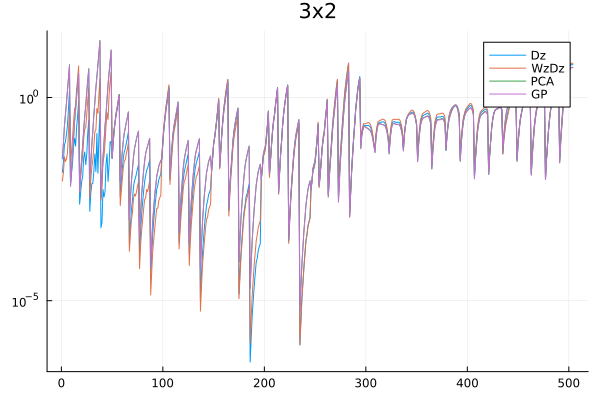

In [24]:
plot(diag(Cmod_dz) ./ diag(meta.cov), label="Dz", yscale=:log10, title="3x2")
plot!(diag(Cmod_wzdz) ./ diag(meta.cov), label="WzDz", yscale=:log10, title="3x2")
plot!(diag(Cmod_pca) ./ diag(meta.cov), label="PCA", yscale=:log10, title="3x2")
plot!(diag(Cmod_gp) ./ diag(meta.cov), label="GP", yscale=:log10, title="3x2")

## Save

In [22]:
using NPZ
npzwrite("../covs/COSMODC2/comp_covs_agro.npz",
        Dict(
        "cov" => diag(meta.cov),
        "TT_dz" => diag(Cmod_dz),
        "TT_wzdz" => diag(Cmod_wzdz),
        "TT_pca" => diag(Cmod_pca),
        "TT_gp" => diag(Cmod_gp)))